# Bootcamp: Construa seu Portfólio em Ciência de Dados

**Autora**: Yanna Cavalcanti

**Data**: Junho 2023

---

## Projeto: Detecção dos principais drivers de churn para retenção de clientes

#### Indústria e mercado

Esse projeto se enquadra na indústria de telecomunicações. Empresas de telecomunicações conhecidas no setor incluem **Vivo**, **Tim** e **Claro**.

#### Contexto

Você foi contratado como cientista de dados por uma empresa de telecomunicações que enfrenta um problema crescente de churn. A empresa deseja reduzir a taxa de cancelamento de seus clientes, aumentando a satisfação e a fidelidade dos mesmos.  Atualmente, a empresa não possui nenhum modelo ou estratégia específica para prever o churn e tomar ações preventivas.

![churn1](https://miro.medium.com/v2/resize:fit:400/0*I9LmVPMFSuDwHumR)

#### Objetivo

Seu objetivo é identificar os principais drivers de churn para a criação de estratégias de retenção. Você fará isso a partir de uma análise exploratória e do desenvolvimento de um modelo de aprendizado de máquina que seja capaz de prever quais clientes estão mais propensos a cancelar o serviço (churn), com base no conjunto de atributos relacionados ao comportamento e no uso dos serviços de telecomunicações. A identificação dos principais drivers acionáveis e como eles interagem entre si vai permitir à empresa tomar ações preventivas, oferecendo promoções, descontos ou outros incentivos para mantê-los satisfeitos e evitar o churn.

![image.png](https://miro.medium.com/v2/resize:fit:800/0*yikht5caA9CDdVEE.jpg)

Você também precisa propor estratégias de redução de churn a partir dos drivers selecionados e demonstrar o **POTENCIAL** de redução da taxa de churn após a implementação de cada uma delas. Para isso, você vai seguir os seguintes passos após descobrir os principais drivers de churn:
* 1) Criar de 2 a 4 estratégias para redução do churn, como ofertas, descontos, bônus, etc.
* 2) Calcular a propensão a churn nos dados de teste com o modelo que você criou.
* 3) **ALTERAR** a feature ou features dos dados de teste que seriam **AFETADAS** pela estratégia que você criou no ponto 1.
* 4) Calcular a propensão ao churn novamente com essa base alterada e comparar com o que você tinha antes para entender quantos % do churn sua estratégia tem o potencial de reduzir.

Lembrando que isso é uma **simulação**, pois não temos como avaliar na vida real o quanto as estratégias estão funcionando. Nossa simulação de POTENCIAL inclui o pressuposto de que **todos os clientes aceitaram a oferta proposta a eles**. Num cenário real, você faria o acompanhamento ao longo do tempo com métricas de performance para avaliar a redução da taxa de churn.

**Dica**: *Keep it simple* ou simplifique! Não tente criar estratégias mirabolantes demais. Tente manter em torno de uma estratégia por driver e evite fazer muitas combinações para não se confundir.



#### Dataset

- **Dataset Source:** [Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)

- **Dataset Description**:

Cada registro no banco de dados descreve um cliente da empresa de telecomunicações. Os dados foram coletados ao longo de um período de tempo e incluem informações sobre o comportamento e o uso dos serviços, bem como algumas características demográficas dos clientes. Os atributos são definidos da seguinte forma:

- CustomerID: um ID único que identifica cada cliente
- Count: um valor usado em relatórios ou painéis para somar o número de clientes em um conjunto filtrado (não é relevante)
- Gender: gênero do cliente
- Country: o país de residência principal do cliente
- State: o estado de residência principal do cliente
- City: a cidade de residência principal do cliente
- Zip Code: O código postal da residência principal do cliente.
- Lat Long: A combinação da latitude e longitude da residência principal do cliente
- Latitude: A latitude da residência principal do cliente
- Longitude: A longitude da residência principal do cliente
- Senior Citizen: indica se o cliente é idoso ou não
- Partner: indica se o cliente possui um parceiro (cônjuge)
- Dependents: indica se o cliente possui dependentes
- Tenure Months: quantidade de meses que o cliente está com a empresa
- Phone Service: indica se o cliente possui serviço de telefone
- Multiple Lines: indica se o cliente possui múltiplas linhas de telefone
- Internet Service: tipo de serviço de internet do cliente (DSL, Fiber optic ou No)
- Online Security: indica se o cliente possui serviço de segurança online
- Online Backup: indica se o cliente possui serviço de backup online
- Device Protection: indica se o cliente possui serviço de proteção de dispositivos
- Tech Support: indica se o cliente possui serviço de suporte técnico
- Streaming TV: indica se o cliente possui serviço de streaming de TV
- Streaming Movies: indica se o cliente possui serviço de streaming de filmes
- Contract: tipo de contrato do cliente (Month-to-month, One year ou Two year)
- Paperless Billing: indica se o cliente recebe a fatura em papel ou eletronicamente
- Payment Method: método de pagamento do cliente (eletrônico, cheque, etc)
- Monthly Charges: valor mensal cobrado do cliente
- Total Charges: valor total cobrado do cliente
- Churn Label: Yes = o cliente saiu da empresa neste trimestre. No = o cliente permaneceu na empresa. Diretamente relacionado ao Churn Value
- Churn Value: 1 = o cliente saiu da empresa neste trimestre. 0 = o cliente permaneceu na empresa. Diretamente relacionado ao Churn Label.
- Churn Score: um valor de 0 a 100 calculado usando a ferramenta preditiva IBM SPSS Modeler. O modelo incorpora vários fatores conhecidos por causar churn. Esse score não será usado nesse case.
- CLTV: Valor Vitalício do Cliente ou *Lifetime value*. Um CLTV previsto é calculado usando fórmulas corporativas e dados existentes. Quanto maior o valor, mais valioso é o cliente. Clientes de alto valor devem ser monitorados para identificar churn.
- Churn Reason: A razão específica do cliente para deixar a empresa. Diretamente relacionado à categoria de churn.

## EDA e pré-processamento

Primeiro vamos checar se o dataset está na pasta importando a biblioteca "os".


In [ ]:
import os 
    
os.listdir("../input/telco-customer-churn-ibm-dataset/")

Agora, vamos ler o dataset com "pandas".

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar o conjunto de dados
data = pd.read_excel("../input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx")

Verificando as primeiras linhas dos dados

In [ ]:
data.head()

#### **Tarefa**: Obtenha as informações **tipo** e quantidade de valores **não-nulos** por coluna com *.info()*

#### **Tarefa**: Filtre apenas as linhas que possuem "Churn Reason" como NaNs usando a função *isna()* e verifique os valores da coluna "Churn Value" para elas usando *value_counts()*. 

**Dica**: Lembre-se que você pode filtrar simplesmente colocando o "filtro" ou condição entre chaves.

Exemplo: Filtrar todos os valores da coluna CLTV iguais a 0

> ```data[data["CLTV"]==0]```



#### **Pergunta**: O que você infere do resultado acima?


#### **Resposta**:


#### **Tarefa**: Preencha os NaNs da coluna "Churn Reason" com uma string "NA" usando a funcão [*fillna()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

#### **Tarefa**: Vamos remover a coluna com o Churn Score e CLTV usando [*.drop(columns=[])*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).
O score de churn da IBM e o CLTV foram adquiridos com um sistema interno que desconhecemos e pode até incluir uma rede pré-treinada com um dataset mais amplo que estes, por isso, não adianta usá-lo como *baseline*. 

#### **Pergunta**: Olhando para as informações que você obteve com *.info()*, todas as variáveis estão correspondento ao seu melhor *tipo*? Muitas figuram como *object*. Há alguma que precisa ser modificada?

**Resposta:**:


#### **Tarefa**: Converta todas as variáveis não-numéricas (incluindo *Lat Long*) para string para fins de análise usando *.astype('string')*. Faça quaisquer outras modificações devidas para as variáveis numéricas.

**Dica**: Se houver alguma variável numérica, você pode usar o [*pd.to_numeric*](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html). Fique atento aos possíveis "erros" e configure o atributo de erros da função como *errors="coerce"*, que permite a criação de NaNs quando há informação faltante.


#### **Tarefa:** Conte novamente quantos nulos há nos dados após as transformações

#### **Tarefa:** Analise a nova variável com nulos, selecionando apenas as linhas cujos valores para cada uma delas são nulos (separadamente) e avaliando os resultados. Escolha a melhor estratégia para lidar com os nulos.

#### **Pergunta**: Considerando que houvessem NaNs na variável Total Charges e que o Tenure Months (tempo na empresa) fosse não-nulo e maior que zero. Que estratégia você poderia adotar para imputar os valores de Total Charges (TC)? 

#### **Resposta:**

#### **Tarefa**: Construa dois histogramas com as variáveis seguintes [sobrepostas no mesmo gráfico](https://www.geeksforgeeks.org/overlapping-histograms-with-matplotlib-in-python/):
- $\text{Total Charges}$
- $\text{Monthly Charges x Tenure Months} $

#### **Pergunta**: O que podemos dizer quanto à semelhança da distribuição dessas duas variáveis? Apenas com a análise dos histogramas, podemos assumir que elas são equivalentes?

#### **Resposta**:

### Teste de Kolmogorov-Smirnov

O teste de Kolmogorov-Smirnov (KS) é uma técnica estatística utilizada para verificar a similaridade entre duas distribuições de dados ou para testar se uma amostra de dados segue uma determinada distribuição teórica. Ele é frequentemente usado para comparar uma distribuição de dados observados com uma distribuição teórica, como a distribuição normal. 

O teste KS calcula a diferença máxima entre as funções de distribuição acumulada (CDF) da amostra observada e da distribuição teórica. Se essa diferença, também chamada de estatística de teste, for menor que um valor crítico específico, podemos aceitar a hipótese nula de que a amostra segue a distribuição teórica.


![KS](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/KS_Example.png/300px-KS_Example.png)

Principais passos do teste:

1) Formulação das hipóteses:

 - Hipótese nula (H0): As duas amostras são extraídas da mesma distribuição.
 $$dist(\text{TC}) = dist(\hat{\text{TC}})$$
 - Hipótese alternativa (H1): As duas amostras não são extraídas da mesma distribuição. 
 $$dist(\text{TC}) \neq dist(\hat{\text{TC}})$$

2) Cálculo da estatística de teste:

  - As amostras são combinadas e ordenadas em ordem crescente.
  - Para cada valor ordenado, calcula-se a diferença entre as duas CDFs (linha azul e vermelha do gráfico).
  - A estatística de teste é a maior diferença absoluta encontrada (seta preta).

3) Determinação do valor crítico ou **p-valor**:

  - O valor crítico da estatística de teste depende do tamanho das amostras e do nível de significância desejado.
  - É possível consultar tabelas ou usar fórmulas específicas para encontrar o valor crítico.

4) Comparação e interpretação:

  - Se a estatística de teste for menor que o valor crítico, não há evidência suficiente para rejeitar a hipótese nula.
  - Se a estatística de teste for maior que o valor crítico, rejeita-se a hipótese nula em favor da hipótese alternativa, concluindo que as duas amostras têm distribuições diferentes.

Importante observar que o teste de Kolmogorov-Smirnov é aplicado para amostras de tamanho moderado a grande. Para amostras pequenas, existem correções específicas para garantir que o teste seja adequado.

#### **Tarefa**:  Realize o teste de Kolmogorov-Smirnov para verificar a verossimilhança da hipótese levantada de que as duas distribuições são iguais. Caso sejam, substitua "Total Charges" pela multiplicação dada acima. Use a função [ks_2samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) da biblioteca scipy stats para calcular o teste KS.

Você pode imputar na função diretamente os valores de cada coluna a ser estudada usando o *.values*

#### **Pergunta**: A partir da estatística e p-valor calculados pelo teste, podemos rejeitar a hipótese nula de que as distribuições são iguais?

#### **Resposta**:


#### **Tarefa**: Substitua total charges pela equação encontrada acima se o teste afirmar que as distribuições são iguais.

### Análise do target

O problema de detecção de churn é um clássico problema de classificação. Ele pode ser visto como um problema de classificação binária ou multiclasses. Geralmente utilizamos a classificação binária (2 classes) para churn. O principal ponto para a decisão entre tratar o problema como classificação binária (classe não churn e classe churn) ou multiclasse (ex: classe não-churn, classe churn tipo 1, classe churn tipo n) tem haver com a **quantidade de amostras** e o **balanceamento** entre as classes.

Para conseguir definir se no problema proposto o ideal é usar o cenário multiclasses ou o cenário binário, o ideal seria analisar, para cada proposta de target (binária ou multiclasse) como **cada uma das features está interagindo**. Neste projeto, para fins de simplificação, utilizaremos o caso **binário**. 




#### **Tarefa**: Calcule as frequências absoluta e relativa para a variável Churn Label.

As definições das duas frequências podem ser fácilmente encontras [aqui](https://pt.wikipedia.org/wiki/Frequ%C3%AAncia_(estat%C3%ADstica))

**Dica**: Utilize a função para dataframe [.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) para ambos os cálculos. No caso da frequência absoluta, sem nenhum tipo de parâmetro adicional, e para a frequência relativa, utilizando o parâmetro fixado normalize=True, que normaliza a contagem pela valor total.




#### **Tarefa**: Crie uma visualização com barras por categoria (histograma) para cada variável do target "Churn Label" que mostrem as frequências absoluta e relativa calculadas.

**Dica**: A função subplots do matplotlib permite que sejam criados multiplos plots na mesma figura. Esses plots podem ser feitos em vários subfiguras (subplots) ou embutidos em uma mesma figura, porém, com eixos verticais distintos (chamados de gêmeos ou *twins*)

[Exemplo usando a função subplots e twins](https://stackoverflow.com/questions/65400669/how-to-generate-two-separate-y-axes-for-a-histogram-on-the-same-figure-in-seabor)

**OBS**: Esse tipo de visualização será bastante utilizado neste case. Procure uma forma do código ser fácil de adaptar sem muito retrabalho.


#### **Pergunta:** A partir do gráfico, você diria que as classes estão balanceadas? Essa taxa é preocupante do ponto de vista da empresa?

#### **Resposta**:

### Tempo de relacionamento: vamos analisar como o Tenure Month está relacionado com o target


#### **Tarefa**: Crie as visualizações dos histogramas da variável Tenure Months para ambas as classes da variável target Churn Label.

**Dica 1**: É possivel visualisar os 2 histogramas na mesma figura de forma sobreposta. Garanta que o histograma que contem menos pontos seja visualisado posteriormente ao com mais pontos (i.e. primeiro o plot do histograma com mais pontos, em seguida o outro),

**Dica 2**: Para ajudar o entendimento, utilizando subplots, visualize o boxplot de cada uma das distribuições utilizando a função da biblioteca seaborn [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

#### **Pergunta:** Existe algum indicativo de como o tempo de relacionamento do cliente com a empresa afeta o probabilidade de churn?

#### **Resposta**: 

#### **Tarefa**: Realize o teste de Kolmogorov comparando as duas distribuições do tempo de relacionamento condicionalmente às classes de churn.

#### **Pergunta:** O que podemos afirmar a partir do teste e das visualizações?

#### **Resposta**: 


### Tipos de contrato: Vamos analisar como "Contract" se comporta com relação ao target

#### **Tarefa**: Crie plots com barras (histograma) por tipo de contrato por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações.

**Dica 1**: Use o mesmo template base feito anteriormente. É preferível e mais fácil que os plots das frequências absoluta e relativa sejam feitas em figuras separadas.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar a variável churn label e poder calcular as frequências a partir das classes da variável Contract. Isso é o equivalente a calcular a probabilidade $P(\text{Contract}|\text{Churn Label} = \text{Yes})$ e $P(\text{Contract}|\text{Churn Label} = \text{No})$, ou seja, a probabilidade condicional do tipo de contrado sabendo o valor da variável churn.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes da variável Churn Label e as barras sejam o tipo de contrato.

#### **Pergunta**: Existe algum tipo de contrato que seja mais propenso a ocorrer churn?

#### **Resposta**: 


### Cobrança mensal e total

Como vimos anteriormente, temos boas garantias para dizer que: $$\text{Total Charges} = \text{Monthly Charges} \cdot \text{Total Tenure}$$ 

Ja vimos a relação que temos de churn com Total Tenure.

#### **Pergunta:** Faz sentido investigar as duas variáveis Total Charges e Monthly Charges?

#### **Resposta:**


#### **Tarefa**: Crie as visualizações dos histogramas da variável Monthly Charges para ambas as classes da variável target Churn Label.

**Dica**: Use o mesmo padrão feito para a variável Tenure Months.

#### **Tarefa**: Realize o teste de Kolmogorov comparando as duas distribuições da cobrança mensal condicionalmente às classes de churn.

#### **Pergunta**: Analisando as figuras e o teste de Kolmogorov, o que podemos concluir?

#### **Resposta**:


### Geolocalização

Procuraremos entender como conjunto de clientes está disperso geograficamente. E como essas variáveis se relacionam com a classe churn. 

Essas são as colunas que dão indicativo de geolocalização:

**'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'**

#### **Tarefa**: Calcule a frequência absoluta dos clientes para as variáveis Pais, Estado e Cidade.

**Dica**: Utilize a função *.groupby()* do pandas para agrupar os valores das tres variáveis e calcule as frequências absolutas utilizando a função *.count()* sobre a variável CustomerID

#### **Pergunta**: Quantos paises, estados e cidades estão presentes na base?

#### **Resposta**:


#### **Tarefa**: Crie uma visualização no mapa da contagem de clientes por cidade.

**Dica**: Utilize a função [scatter_mapbox](https://plotly.com/python/scattermapbox/) da blioteca de visualização plotly express, que permite a criação dos mapas utilizando as variáveis do conjunto de dados Latitude e Logitude. Você pode utilizar diretamente o resultado das frequências absolutas na variável hover.

#### **Pergunta:** Existe alguma cidade ou região com maior concentração de clientes?

#### **Resposta**:

#### **Tarefa**: Crie um plot com barras (histograma) para cada uma das top 10 cidades com mais clientes mostrando as frequências absolutas e relativas ordenadas.

**Dica**: Use a mesma metodologia aplicada na análise das classes de churn.


#### **Pergunta**: Com essas visualizações, a distribuição de clientes está coerente com as populações gerais?
[Senso americano](https://en.wikipedia.org/wiki/List_of_largest_cities_in_California_by_population)

#### **Resposta**: 


#### **Tarefa**: Crie uma visualização de dispersão para mostrar como a probabilidade de churn está relacionada a frequência absoluta de clientes para cada cidade.

**Dica 1**: Utilize a função *groupby* do pandas para agrupar cidades e aplique à coluna 'Churn Value' a função [.agg](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) para calcular tanto a frequência absoluta (usando *count*) quanto a probabilidade de churn (usando *mean*).

**Dica 2**: Utilize a função [.scatter](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py) do matplotlib para criar a visualização de dispersão.


#### **Pergunta:** Como está a distribuição de churn segundo essas cidades?

#### **Resposta:** 


#### **Tarefa**: Crie uma visualização geográfica que mostre a probabilidade de churn para cada cidade.

**Dica 1:** Utilize apenas 1 variável Latitude e Longitude para cada cidade. Você pode escolher utilizando a função do pandas [.drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) com a escolha do parâmetro subset sendo a variável Cidade.

**Dica 2** Crie um dataframe que seja a junção desse dataframe filtrado de Latitude e Longitude por cidade com o dataframe que você calculou as probabilidades de churn por cidade no exemplo acima. Utilize a função [.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) para tal junção.

**Dica 3** Crie o plot da mesma forma que anteriormente com a função scatter_mapbox, porém com a variável hover sendo essa probabilidade calculada.


#### **Pergunta** Conseguimos identificar algum padrão para a probabilidade de churn que indique fator geográfico relevante?

#### **Resposta**: 


### Tipos de serviço

Iremos analisar como os tipos de serviço impactam o churn dos consumidores.

Na base de dados temos as seguintes colunas:

**'Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV', 'Streaming Movies'**



#### **Pergunta:** Podemos usar a correlação de pearson para calcular a relação entre essas variáveis e a variável target?


#### **Resposta:** 


### Medindo relacionamento entre variáveis categóricas não-ordinais.

Existem algumas formas para medir a relação entre variáveis categóricas não-ordinais, ou que não tenham nenhuma relação de ordem entre sí. Duas maneiras usuais de utilizar algumas medidas estatísticas específicas para esse tipo de dados são: o coeficiente de contingência e o teste qui-quadrado (chi-quadrado).

 - [**Teste qui-quadrado (chi-quadrado)**](https://pt.wikipedia.org/wiki/Teste_qui-quadrado_de_Pearson): O teste qui-quadrado é um teste estatístico que avalia a associação entre duas variáveis categóricas, comparando as frequências observadas com as frequências esperadas, assumindo que não há associação. Se o valor-p (p-value) do teste qui-quadrado for menor que um nível de significância pré-definido (geralmente 0,05), então rejeita-se a hipótese nula de não associação, o que indica que há uma correlação significativa entre as variáveis.


 - [**Coeficiente de Contingência:**](https://pt.wikipedia.org/wiki/Coeficiente_de_conting%C3%AAncia) O coeficiente de contingência (ou Cramér's V) é uma medida que varia entre 0 e 1, onde 0 significa nenhuma associação entre as variáveis categóricas e 1 indica uma associação perfeita. Quanto mais próximo de 1, maior é a correlação entre as variáveis.

Neste projeto, utilizaremos o **teste qui-quadrado**.


#### **Tarefa**: Primeiro, copie seu dataframe original, mantendo apenas as colunas dos tipos de serviço

#### **Tarefa**:  Construa a [tabela de contingência](https://pt.wikipedia.org/wiki/Tabela_de_conting%C3%AAncia) entre o Churn Label e uma variável dos tipos de serviço (por exemplo, "Phone Service"). Utlize a função do pandas [pd.crosstab](https://www.statology.org/contingency-table-python/).

#### **Tarefa**: Calcule o teste de Qui-quadrado utilizando a função [chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) da biblioteca scipy.stats, passando como parâmetro a tabela de contingência.

#### **Tarefa**: Repita esse processo para todas as colunas. Você pode incluir o processo em um loop for se preferir.

#### **Pergunta**: Quais são os 3 tipos de serviço mais relacionados com a variável target? Existe algum que não tenha relação nenhuma?

#### **Resposta**:


### Servicos de Internet

#### **Tarefa**: Crie um plot com barras (histograma) por categoria da variável *Internet Service* mostrando as frequências absolutas e relativas ordenadas.

**Dica**: Utilize a mesma metodologia aplicada às classes de chunr.

#### **Tarefa**: Crie plots com barras (histograma) por categoria da variável *Internet Service* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações.

**Dica 1**: Use o mesmo template base feito anteriormente para a variável tipo de contrato.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar a variável churn label e poder calcular as frequências a partir das classes da variável Internet Service. Isso é o equivalente a calcular a probabilidade $P(\text{Internet Service}|\text{Churn Label} = \text{Yes})$ e $P(\text{Internet Service}|\text{Churn Label} = \text{No})$, ou seja, a probabilidade condicional do tipo de serviço de internet sabendo o valor da variável churn.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes da variável Churn Label e as barras sejam os tipos de serviço de internet.

#### **Tarefa**: Crie plots com barras (histograma) por categoria da variável *Internet Service* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações, porém, considerando o eixo X como sendo os tipos de Internet Service.

**Dica 1**: Use o mesmo template base feito acima.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar a variável Internet Service e poder calcular as frequências a partir das classes da variável Churn Label. Isso é o equivalente a calcular a probabilidade $P(\text{Churn Label} | \text{Internet Service} = \text{DSL})$, $P(\text{Churn Label} | \text{Internet Service} = \text{Fiber optic})$, ou seja, a probabilidade condicional do churn sabendo o valor da variável Internet Service..

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes da variável Internet Services e as barras sejam as classes da variável Churn Label.

#### **Pergunta:** Existe alguma predileção por serviços de internet para clientes que tem mais propensão ao churn?

#### **Resposta**: 


### Tech Support

#### **Tarefa**: Realize as mesmas análises feitas para a variável *Internet Service*, agora considerando a variável *Tech Support* e a target *Churn Label*

#### **Pergunta**: O que podemos observar da relação entre as variáveis *Tech Support* e da variável target *Churn Label*?

#### **Resposta**:

#### **Tarefa**: Crie plots com barras (histograma) por categoria da variáveis *Internet Service*,*Tech Support* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações, porém, considerando o eixo X como sendo a combinação entre os tipos de *Internet Service* e *Tech Support*.

**Dica 1**: Use o mesmo template base feito para as variáveis acima.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar as variáveis ['Internet Service','Tech Support'] e poder calcular as frequências a partir das classes da variável Churn Label. Isso é o equivalente a calcular a probabilidade $P(\text{Churn Label} | \text{Internet Service} = \text{DSL}, \text{Tech Support} = \text{Yes})$, por exemplo, ou seja, a probabilidade condicional do churn sabendo o valor da variável Internet Service e da variável Tech Support.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes das variáveis ['Internet Service','Tech Support'] e as barras sejam as classes da variável Churn Label.

#### **Pergunta**: Como o relacionamento entre as 2 variáveis *Internet Service* e *Tech Support* interferem na probabilidade de churn?

#### **Resposta**:


### Segurança Online

#### **Tarefa**: Realize as mesmas análises feitas para a variável *Internet Service*, agora considerando a variável *Online Security* e a taget *Churn Label*

#### **Pergunta**: O que podemos entender da relação entre *Online Security* e *Churn Label*? 

#### **Resposta**: 


### Tipo de pagamento

#### **Tarefa**: Realize as mesmas análises feitas para a variável *Internet Service*, agora considerando a variável *Payment Method* e a taget *Churn Label*

#### **Pergunta**: Como se dá a relação entre as variáveis *Payment Method* e *Churn Label*?

#### **Resposta**:


#### **Tarefa**: Crie plots com barras (histograma) por categoria da variáveis *Internet Service*,*Payment Method* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações, porém, considerando o eixo X como sendo a combinação entre os tipos de *Internet Service* e *Payment Method*.

**Dica 1**: Use o mesmo template base feito na análise de Tech Support e Internet Services.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar as variáveis ['Internet Service','Payment Method'] e poder calcular as frequências a partir das classes da variável Churn Label. Isso é o equivalente a calcular a probabilidade $P(\text{Churn Label} | \text{Internet Service} = \text{DSL}, \text{Payment Method} = \text{Electronic check})$, por exemplo, ou seja, a probabilidade condicional do churn sabendo o valor da variável Internet Service e da variável Payment Method.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes das variáveis ['Internet Service','Payment Method] e as barras sejam as classes da variável Churn Label.

#### **Pergunta** Como está a relação entre as três variáveis? O que podemos inferir exclusivamente da combinação Fibra-Otica e Electronic check?

#### **Resposta**: 


### Variáveis de Cliente

Iremos analisar como os as variáveis de cliente impactam o churn dos consumidores.

Na base de dados temos as seguintes colunas:

**'Gender','Senior Citizen','Partner','Dependents'**

#### **Tarefa**: Faça as mesmas análises que você fez para os tipos de serviço para cada categoria

## Preparação de dados para modelagem

Vimos anteriormente que várias variáveis influenciam na probabilidade de churn. Iremos inciar aqui nessa sessão a seleção e a preparação de dados para a modelagem.

#### **Tarefa**: Crie um dataset que seleciona apenas as colunas que iremos utilizar na modelagem considerando também uma coluna para a variável target.

**Dica 1**: Utilize o conhecimento que você adquiriu durante a análise de dados para escolher as colunas que tenham potencial de relação com o target.

**Dica 2**: Cuidado com o numero elevado de colunas. Quanto mais colunas, mais são necessárias amostra para o modelo ter uma performance adequada.

**Dica 3**: Em um primeiro momento, prefira não envolver dados de geolocalização. A menos que você tenha descoberto alguma relação entre as variáveis ou entre alguma transformação delas.

#### **Tarefa**: Crie dois dataframes separados, um contendo apenas as variáveis categóricas e o outro contendo as demais colunas.

**Dica 1**: A função do pandas [select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) pode ser útil para definir as colunas não-categóricas.

**Dica 2**: Existe uma coluna no dataset que já considera o target como sendo numérico, portando de preferência para escolha dessa coluna como target

#### **Tarefa**: Transforme as variáveis categóricas em numéricas utilizando OneHotEncoding.

**Dica 1**: Você pode fazer de maneira manual ou utilizando a função do pandas [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) para essa transformação. Para evitar redundância de resultados, fixe o parâmetro drop_first=True se for usar o pandas. Essa escolha remove 1 coluna do dadaset.

**Dica 2**: Você pode converter todas as colunas categoricas de uma única vez com essa função, porém, por conta do drop_first, algumas colunas que podem ser mais fáceis de interpretar pode ser removidas. Investigue se a trasnformação está boa para a sua análise e, caso contrário, realize a operação individualizada para essas colunas.

#### **Tarefa**: Concatene todas as colunas transformadas e as que não foram no mesmo dataset.

**Dica**: Utilize a função do pandas [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) para essa junção. Como faremos a junção de colunas, utilize o parâmetro axis=1.

## Modelo de previsão do churn

Neste projeto, vamos lidar com o problema de churn, construindo um modelo de classificação binária. O modelo utilizado será o XGBoost. O XGBoost é um modelo que necessita da estimação de diversos hiperparâmetros e, por isso, vamos implementar uma busca em grade ou *grid-search*.

O Grid Search é uma técnica utilizada para encontrar a melhor combinação de hiperparâmetros para um modelo de aprendizado de máquina. Esses hiperparâmetros são valores ajustáveis que não são aprendidos pelo modelo durante o treinamento, mas que podem influenciar significativamente sua performance. O Grid Search realiza uma busca exaustiva em um espaço **pré-definido** de hiperparâmetros, combinando todas as possíveis combinações e avaliando o desempenho do modelo com cada uma delas. Para cada combinação de hiperparâmetros, o Grid Search utiliza uma **estratégia de validação cruzada** para avaliar a performance do modelo de forma mais robusta. Ao final da busca, o Grid Search retorna a combinação de hiperparâmetros que resultou no melhor desempenho, permitindo assim que o modelo seja configurado de maneira ótima para a tarefa em questão.

Todos os conceitos necessários para completarmos a tarefa são descritos abaixo.

### Protocolos de validação

Existem várias técnicas de validação que podem ser utilizadas para avaliar o desempenho de modelos de aprendizado de máquina. Em grandes linhas, podemos destacar as seguintes:


- **Amostragem de retenção (*Hold-out*)**:
    O hold-out é uma das abordagens mais simples e populares para dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste. Nesta técnica, você reserva uma parte dos dados (por exemplo, 70-80%) para treinar o modelo e a outra parte (por exemplo, 30-20%) para testá-lo. Apesar de sua simplicidade, essa técnica pode ser propensa a variações nos resultados, dependendo de como os dados são divididos. A escolha aleatória das amostras pode levar a resultados variáveis, o que pode não ser uma estimativa precisa do desempenho geral do modelo. Isso acontece especialmente quando o conjunto de dados é pequeno ou quando há desequilíbrio entre as classes (em problemas de classificação). Porém, para conjuntos de dados com alto volume de amostras, essas variações são mitigadas além de fornecer um processamento mais rápido que em outras técnicas.
     
 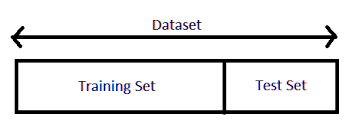

- **Validação Cruzada (*Cross-Validation*)**:
    A validação cruzada é uma técnica mais sofisticada que ajuda a obter estimativas mais estáveis do desempenho do modelo. Existem várias formas de validação cruzada, sendo a validação cruzada k-fold a mais comum. Nessa abordagem, o conjunto de dados é dividido em k partes (dobras) de tamanho igual. O modelo é treinado k vezes, cada vez usando k-1 dobras como conjunto de treinamento e a dobra restante como conjunto de teste. Ao final das k iterações, os resultados de desempenho do modelo (por exemplo, métricas de avaliação) são agregados e geralmente são calculadas médias ou medianas para fornecer uma estimativa mais precisa do desempenho geral do modelo. 
    A validação cruzada é especialmente útil quando o tamanho do conjunto de dados é limitado ou quando há uma distribuição desigual de classes, pois permite que todas as amostras contribuam tanto para o treinamento quanto para a avaliação do modelo, reduzindo assim o impacto de variações na divisão dos dados. Ao usar técnicas de validação cruzada, é importante ter em mente que a estimativa do desempenho do modelo pode depender da escolha de k. Geralmente, valores comuns para k são 5 ou 10, mas em casos de conjuntos de dados muito pequenos, o LOOCV (Leave-One-Out Cross-Validation) pode ser considerado, onde cada amostra é usada como conjunto de teste uma vez, enquanto todas as outras amostras são usadas para treinar o modelo. O LOOCV fornece uma estimativa não enviesada do desempenho do modelo, mas pode ser computacionalmente mais intensivo.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="crossval" width="40%">


#### **Tarefa**: Crie suas variáveis X e y, onde X são as features do seu modelo e y a target. Depois, separe um conjunto de TESTE usando a amostragem de retenção para que possamos fazer uma "simulação da realidade" com dados não-vistos. Você pode usar a função [*train_test_split*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do sklearn e um tamanho de dataset de teste de 20%.

**Dica**: Lembre-se que nosso dataset é extremamente desbalanceado, por isso, é importante "estratificar", ou seja, garantir que temos a mesma proporção de target tanto no subconjunto de treino, quando de teste. Para isso, você pode parametrizar o atributo de entrada da função train_test_split com *stratify=y*, sendo y sua target.

### Validação Cruzada Estratificada 

Para a validação no treino, utilizaremos avalidação cruzada. Dado o tamanho do conjunto de dados, a estratégia Leavo-One-Out parece não ser uma boa escolha pelo tempo de processamento necessário. Poderíamos então utilizar a K-fold cross validation? Talvez não seja a melhor opçãopor termos classes **desbalanceadas**. Numa amostragem aleatória, temos muita chance de ter um resultado ruidoso devido a falta de amostras da classe minoritária nos folds de treinamento. Uma forma de trazer robustez a saída é utilizando a **Validação Cruzada Estratificada**.

A Validação Cruzada Estratificada ([StratifiedKFold no sklearn](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold)) é uma técnica de validação cruzada que divide o conjunto de dados em k partes (dobras) de forma estratificada, preservando a proporção de classes em cada subconjunto. É especialmente útil quando se tem classes desequilibradas, garantindo que cada subconjunto tenha uma distribuição similar de classes. Geralmente, o StratifiedKFold é utilizado uma única vez para dividir o conjunto de dados em k subconjuntos e treinar/testar o modelo em cada uma delas.

![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png)

Indo além, contamos também com a possibilidade de utilizar a Validação Cruzada Estratificada Repetida ([RepeatedStratifiedKFold do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#sklearn.model_selection.RepeatedStratifiedKFold)) que é uma extensão do StratifiedKFold que repete a validação cruzada estratificada múltiplas vezes para melhorar a robustez das estimativas de desempenho do modelo. Além de dividir o conjunto de dados em k partes estratificadas, ele repete esse processo n vezes, gerando diferentes divisões aleatórias dos dados em cada repetição. A repetição é útil quando o conjunto de dados é relativamente pequeno ou quando se deseja obter uma estimativa mais estável e confiável do desempenho do modelo, levando em conta a variabilidade decorrente da aleatoriedade das divisões dos dados.


Para o nosso problema utilizaremos a forma não repetida, devido aos tempos de treinamento e o caráter didático. Porém, se quiserem testar a com repetição, fiquem à vontade. E, por favor, comentem sobre os resultados conosco.

#### **Tarefa**: Defina um objeto com a validação cruzada. Esse objeto será utilizado mais à frente.

[StratifiedKfold](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold)

**Dica**: Aplique 4 splits e use shuffle=True. Caso queira ter resultados replicáveis, fixe um random_state qualquer.

#### **Pergunta**: Como podemos resolver o problema de desbalanceamento das classes?

#### **Resposta:**

### Técnicas para tratar o desbalanceamento

Uma das principais estratégias para lidar com o desbalanceamento de classes é a reamostragem do conjunto de treinamento. Na reamostragem, podemos aplicar o *undersampling* e o *oversampling*. 
- *Undersampling* ou subamostragem: remoção estratégica de amostras da classe majoritária para reduzir o viés em direção a essa classe.
- *Oversampling*: aumento de amostras da classe minoritária. Uma eficiente técnica de oversampling é o SMOTE (Synthetic Minority Over-sampling Technique), que cria amostras sintéticas da classe minoritária para equilibrar as proporções das classes. Ele utiliza uma abordagem similar à do KNN.

![smote](https://www.researchgate.net/publication/347937180/figure/fig3/AS:973429209563136@1609095017080/Illustration-of-the-SMOTE-oversampling-approach.ppm)

Outra abordagem eficaz é o uso de **modelos ensemble**, como Random Forest, Gradient Boosting e XGBoost. Esses modelos têm a capacidade de combinar as previsões de vários classificadores, reduzindo o impacto do desequilíbrio e fornecendo uma classificação mais robusta. Os modelos ensemble também podem ser menos sensíveis aos problemas causados pelo desbalanceamento, tornando-os uma opção valiosa.

Para lidar com a questão do peso das features, podemos aplicar técnicas de seleção de features. A seleção adequada das características mais relevantes para o problema pode ajudar a melhorar a representatividade do conjunto de dados e, consequentemente, a eficácia do modelo.

Outra estratégia importante é ajustar os pesos das classes durante o treinamento do modelo. **Atribuir maior peso à classe minoritária** faz com que o modelo dê mais importância a ela durante o aprendizado, ajudando a corrigir o viés em direção à classe majoritária.


No nosso problema, iremos utilizar algumas delas: o **SMOTE**, o modelo **XGBOOST** e adicionar à pesquisa de hiperparâmetros, com GridSearch, **pesos para classe minoritária** (parâmetro scale_pos_weight do XGBOOST).


### XGBOOST

O XGBoost (Extreme Gradient Boosting) é um algoritmo de aprendizado de máquina que utiliza a técnica de gradient boosting para construir modelos de alta precisão. Vamos explicar o funcionamento do XGBoost em um passo a passo simples:

1. Inicialização dos pesos: O processo começa atribuindo pesos iguais a todas as instâncias de treinamento. Esses pesos são usados para dar mais importância às instâncias que foram classificadas incorretamente nas etapas anteriores.

2. Etapas iterativas: O XGBoost cria árvores de decisão em etapas iterativas. Em cada iteração, uma nova árvore é adicionada ao modelo para corrigir os erros cometidos pelas árvores anteriores.

3. Cálculo do gradiente e hessiano: Para cada instância de treinamento, o XGBoost calcula o gradiente e o hessiano da função de perda, que medem a direção e a magnitude do erro em relação à previsão atual.

4. Construção da árvore: Com base nos gradientes e hessianos calculados, o XGBoost constrói uma árvore de decisão para minimizar a função de perda. Essa árvore é adicionada ao modelo.

5. Regularização: O XGBoost utiliza técnicas de regularização, como penalização L1 e L2, para evitar overfitting e melhorar a generalização do modelo.

6. Atualização dos pesos: Após a construção da árvore, os pesos das instâncias de treinamento são atualizados com base nos erros cometidos pela nova árvore.

7. Atualização do modelo: O processo de construção de árvores e atualização de pesos é repetido várias vezes (número de iterações definido pelo usuário) para criar um modelo final que combina as previsões de todas as árvores.

![xgboost](https://miro.medium.com/v2/resize:fit:560/1*85QHtH-49U7ozPpmA5cAaw.png)

O XGBoost é conhecido por sua eficiência e precisão em problemas de classificação e regressão. Ele é amplamente utilizado em competições de ciência de dados e é uma das bibliotecas de machine learning mais populares. Sua flexibilidade, recursos de regularização (imploementação interna de normas l1 e l2) e capacidade de lidar com grandes conjuntos de dados (possibilidade de processamento paralelo) tornam-no uma escolha poderosa para muitas tarefas de aprendizado de máquina. É importante destacar que o XGBoost tem uma maneira interna eficiente de tratar dados faltantes e, portanto, você pode colocar NaNs em sua entrada.

#### **Tarefa**: Complete o estimador abaixo com a função objetiva correta. Lembre-se que temos um problema de classificação binária.

**Dica**: Dentre as funções objetivas possíveis para classificações binárias, a mais comumente utilizadas é a *binary:logistic*, que oferece a probabilidade como output.

[XGBoost - GetStarted](https://xgboost.readthedocs.io/en/stable/get_started.html)

In [ ]:
from xgboost import XGBClassifier

# Definição do Modelo e dos hiperparâmetros a serem pesquisado
estimator = XGBClassifier(
    objective= ???, #adicione a função objetiva relativa à classificação binária
    seed=42
)


#### **Tarefa**: Complete o dicionário de parâmetros abaixo com diferentes valores de parâmetros para serem testados no modelo. Não se esqueça de setar valores maiores que 1 para o hiperparâmetro "classifier__scale_pos_weight" para tratar o desbalanceamento das classes

In [ ]:
param_grid = {
    'classifier__max_depth':  [3,10,15], # exemplo de entrada
    'classifier__n_estimators': [???], # complete com no máximo 3 valores entre 100 e 1000 em formato de lista
    'classifier__learning_rate': [???], # complete com no máximo 3 valores entre 0.01 e 1 em formato de lista
    'classifier__scale_pos_weight': [???] # complete com no máximo 3 valores entre 1 e 20 em formato de lista

}

### Pipelines

Uma pipeline é uma sequência ordenada de etapas de pré-processamento e modelagem em um fluxo de trabalho de aprendizado de máquina. Ela permite automatizar e organizar a execução de diversas tarefas, como tratamento de dados faltantes, normalização, seleção de características e treinamento de modelos, em uma única estrutura. A utilização de pipelines proporciona benefícios significativos, pois torna o processo mais eficiente, evita vazamento de informações, melhora a reprodutibilidade e facilita a experimentação com diferentes combinações de etapas e hiperparâmetros. Além disso, a pipeline possibilita a implantação de modelos em produção de forma mais confiável, uma vez que as etapas são padronizadas e organizadas, garantindo que novos dados sigam o mesmo tratamento aplicado durante o treinamento.

**Aqui, utilizamos a pipeline sobretudo para garantir que todas as etapas serão aplicadas em todos os subconjuntos da validação cruzada.**

Uma das pipelines mais populares é a do [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Aqui, utilizaremos a pipeline da biblioteca [imbalanced learn](http://glemaitre.github.io/imbalanced-learn/generated/imblearn.pipeline.Pipeline.html), pois ela de adequa ao SMOTE.

#### **Tarefa**: Crie um pipeline com a biblioteca do [imbalanced learn](http://glemaitre.github.io/imbalanced-learn/generated/imblearn.pipeline.Pipeline.html) que tenha como passos primeiro o SMOTE e, em seguida, o estimador XGBoost que você construiu acima.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Definição do pipeline de transformação e classificação
pipeline = imbpipeline(steps = [['smote', ???], # Insira aqui o objeto SMOTE importado acima. Você pode fixar um random_state para ter resultados replicáveis.
                                ['classifier', ??? ]]) # Insira aqui o estimador XGBoost criado acima.



### Métricas para classificação

A figura abaixo apresenta algumas métricas de classificação binária, bem como os conceitos de TP, Tn, FP e FN.

![image.png](https://miro.medium.com/v2/resize:fit:842/1*LVilqC3cy4AgyC1wD4RH-A.png)

As métricas também sofrem com problema de desbalanceamento. Um caso clássico de problema de desbalancemento é da acurácia. Se não dermos o devido peso para as classes, facilmente atingimos patamares de 98% a 99%, pois o numero de TP, FP e FN fica negligenciável perto de TN.

Outras métricas, como Precision e Recall, são bons aliados na nosso problema.

- **Precision** (Precisão):

    Precision é uma métrica que mede a proporção de instâncias classificadas como positivas (verdadeiras positivas) corretamente em relação ao total de instâncias classificadas como positivas (verdadeiras positivas + falsos positivos). Essa métrica é bastante útil quando o foco é reduzir os falsos positivos, ou seja, quando é crítico evitar a classificação errônea de exemplos negativos como positivos. Isso é especialmente relevante em problemas onde os falsos positivos podem ter consequências graves.

- **Recall** (Sensibilidade ou True Positive Rate):

    Recall mede a proporção de instâncias positivas corretamente classificadas (verdadeiros positivos) em relação ao total de instâncias verdadeiramente positivas (verdadeiros positivos + falsos negativos). Essa métrica é especialmente importante quando o objetivo é identificar corretamente todos os exemplos positivos, pois minimiza os falsos negativos. Isso é relevante em cenários onde a não detecção de exemplos positivos pode ter consequências negativas.

O ideal é sempre ter o máximo de precisao na detecção da classe minoritária e sensibilidade quanto a identificação de toda essa classe. Uma forma de aliar as duas é utilizando a chamada métrica F1.

- **F1 Score**:

    O F1 Score é uma métrica que combina Precision e Recall para obter um equilíbrio entre elas. É a média harmônica entre as duas métricas.
    
    $$ F1_{Score} = 2 * \frac{(Precision * Recall)}{(Precision + Recall)}$$
    
    O F1 Score é valioso em situações de desequilíbrio de classes, pois leva em conta tanto os falsos positivos quanto os falsos negativos. Isso faz com que seja uma métrica geralmente confiável para avaliar o desempenho do modelo em conjuntos de dados desbalanceados.



- **ROC AUC**:

    ![image.png](https://miro.medium.com/v2/resize:fit:722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

    O ROC AUC mede a capacidade do modelo de distinguir entre as classes, independentemente do ponto de corte de classificação escolhido. É uma métrica que leva em consideração tanto a taxa de verdadeiros positivos (recall) quanto a taxa de falsos positivos. Essa métrica é útil quando se deseja avaliar o desempenho global do modelo em diferentes pontos de corte de classificação e quando a proporção entre as classes não é o principal foco da avaliação.


Aqui, temos a possibilidade de escolher qual utilizaremos. Em um panorama geral, se o desbalanceamento entre as classes for significativo e você estiver mais preocupado em ter um bom equilíbrio entre precisão e recall, o F1 Score pode ser mais adequado. Ele penaliza modelos que favorecem uma classe majoritária em detrimento da classe minoritária. Por outro lado, se você estiver interessado em uma visão mais geral da capacidade discriminativa do modelo e a proporção entre as classes não for o fator mais crítico para sua aplicação, o ROC AUC pode ser uma boa escolha.

No final das contas, a escolha da métrica depende das necessidades e objetivos específicos do problema em questão. É sempre uma boa prática considerar várias métricas, incluindo o ROC AUC e o F1 Score, para obter uma visão mais completa do desempenho do modelo e tomar decisões informadas em relação aos resultados.

Para o nosso propósito, escolheremos **ROC AUC** pois queremos descobrir, de forma geral, como podemos reduzir o problema do Churn e não necessariamente mitigar ponto a ponto dos clientes que serão churn. Porém, você também poderia aplicar o F1 score nesse caso.

#### **Tarefa**: Crie um objeto de Grid Search com Cross-validation usando o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) do Sklearn, utilizando tudo que foi definido acima: pipeline, parameter grid, stratifiedKfold e utilizando a métrica 'roc_auc'para o scoring.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definição da estratégia de pesquisa de hiperparâmetros com gridsearch com a metrica ROC AUC
grid_search = GridSearchCV(estimator=???, # Adicione aqui o pipeline. Se não houvesse pipeline, você adicionaria direto o estimador.
                           param_grid=???, # Adicione o grid de parâmetros
                           scoring=???, # Escolha a opção 'roc_auc' para o scoring
                           cv=???, # Adicione a estratégia de validação cruzada definida acima
                           n_jobs=-1)

#### **Tarefa**: A hora do .fit()!!! Realize o .fit() do processo de grid search nos dados de treino
Vá tomar um cafezinho enquanto aguarda...

#### **Tarefa:** Verifique qual foi o melhor score e os melhores parâmetros do seu modelo, fazendo o print dos atributos [*.best_score_*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#:~:text=on%20allowed%20values.-,best_score_float,-Mean%20cross%2Dvalidated) e [*best_params_*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#:~:text=is%20a%20function.-,best_params_dict,-Parameter%20setting%20that) do seu objeto de grid search criado e treinado acima.

#### **Tarefa:** Agora crie um objeto e atribua a ele o melhor modelo do seu grid_search usando [*.best_estimator_*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#:~:text=best_estimator_estimator)['classifier']

Observação: é importante que você selecione apenas o "classificador" do best estimator, pois o SMOTE **NÃO** deve ser implementado em teste. Em alguns outros casos, você pode sim fazer uma sequência de préprocessamentos em um pipeline que façam sentido tanto para treino, quanto para teste, mas não nesse caso.

#### **Tarefa**: Com esse modelo, faça um *.predict()* para obter as inferências dos seus dados de teste

## Avaliando a performance do modelo

#### **Tarefa**: Utilize o [*classification_report*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do Sklearn para verificar o f1-score, precision e recall por classe no **teste**, bem como acurácia total, vistas acima.

#### **Tarefa**: Agora, utilize a função [*roc_auc_score*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) do Sklearn para verificar o ROC AUC do modelo.

#### **Tarefa**: Apresente a matriz de confusão utilizando a função [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) do Sklearn e utilize o [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) do Seaborn para plotar

#### **Pergunta**: O que você infere de todas essas métricas?

#### **Resposta**:


#### **Pergunta:** Como aprimorar ainda mais os resultados?

#### **Resposta:** 


## Análise dos drivers de churn

Existem diversas maneiras de avaliar os principais *drivers* de churn para este caso ou das features com maior poder preditivo para o target em questão, de uma forma mais geral. Neste projeto, utilizaremos o conceito de **SHAP values**.

### SHAP Values


Shapley Values, comumente referidos como Shap Values, é um conceito derivado da teoria dos jogos que foi adaptado para a análise de modelos de machine learning. Essa técnica permite atribuir importância a cada feature (característica) em uma previsão específica feita por um modelo. Assim, o seu objetivo é trazer **explicabilidade** até para modelos mais complexos que, em princípio, seriam uma "caixa-preta" ininteligível.

O objetivo dos Shap Values é entender como a contribuição de cada feature afeta a saída ou previsão do modelo para um exemplo de entrada em particular. Em outras palavras, eles quantificam o quanto cada feature contribuiu para a diferença entre o valor predito pelo modelo para um determinado exemplo e o valor médio de todas as previsões.

Resumidamente, o conceito de Shap Values pode ser explicado da seguinte maneira:

- Contexto do problema: Imagine que temos um modelo de machine learning treinado e queremos explicar a previsão do modelo para um exemplo específico.

- Definição do Shap Value: O Shap Value para uma determinada feature em um exemplo de entrada é a contribuição média dessa feature para todas as possíveis combinações de features ao compará-la com o valor médio de todas as previsões.

**Exemplo**: Na figura abaixo, foram calculados diversos valores SHAP, ou seja, o resultado do target "y" para vários valores de features, porém com a feature MedInc fixada nos diferentes pontos do eixo x:

<img src="https://shap.readthedocs.io/en/latest/_images/example_notebooks_overviews_An_introduction_to_explainable_AI_with_Shapley_values_21_0.png" alt="crossval" width="40%">

Podemos, então, tirar uma média do valor de "y" para cada valor de x e isso vai nos dar uma ideia de como y se comporta quando x está naquele ponto. A diferença entre esse valor médio de x em cada ponto e o valor esperado de y em todos os casos (linha pontilhada horizontal cinza) é a contribuição de x para y.

<img src="https://shap.readthedocs.io/en/latest/_images/example_notebooks_overviews_An_introduction_to_explainable_AI_with_Shapley_values_20_0.png" alt="crossval" width="40%">


- Importância individual de features: Os Shap Values permitem medir a importância individual de cada feature em relação à previsão do modelo. Eles representam o quanto cada feature contribuiu para a diferença entre a previsão específica e a média das previsões do modelo.

- Propriedade de aditividade: Uma propriedade fundamental dos Shap Values é que eles são aditivos. Ou seja, a soma dos Shap Values de todas as features mais o valor médio das previsões do modelo é igual à previsão específica para o exemplo em questão.

Essa abordagem de interpretação é particularmente útil para entender as decisões de modelos de machine learning complexos, como Gradient Boosting Machines e Redes Neurais, que normalmente são caixas-pretas e difíceis de explicar. Com os Shap Values, os cientistas de dados e os stakeholders podem ganhar insights sobre quais características estão mais influenciando as previsões e compreender como o modelo toma decisões para cada exemplo de entrada. Essa interpretação da performance do modelo é valiosa em muitos cenários, como em decisões críticas, explicabilidade de modelos em aplicações reais, detecção de viés e em conformidade com regulamentos, onde é necessário entender como as características individuais afetam as previsões do modelo

[Biblioteca SHAP Values](https://shap.readthedocs.io/en/latest/)

#### **Tarefa**: Realize o plot do sumário da função de SHAP values uilizando [*shap.summary_plot()*](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html)

In [ ]:
# A utilização da bica SHAP não é tão trivial. Por isso, vou deixar a configuração pronta para você fazer as modificações necessárias
import shap
shap.initjs()

# Tarefa: substitua seus dados de teste que você definiu acima pela variável x_test abaixo
X_sample = pd.DataFrame(x_test, columns = encoded_df.drop(columns = ["Churn Value"]).columns.tolist()) 

# Calculo do Shapvalues isando TreeExplainer
explainer = shap.TreeExplainer(
    method['classifier'],
    data = X_sample,
    feature_perturbation="interventional",
    model_output="probability",
)
shap_values = explainer(X_sample)

In [ ]:
# Visualização do efeito médio das variáveis em ordem de prioridade para o modelo com summary_plot
shap.summary_plot(shap_values, X_sample) 

In [ ]:
# Visualização do efeito médio das variáveis de forma absoluta com o plot em barras
shap.summary_plot(shap_values, X_sample, plot_type='bar') 

#### **Tarefa**: O que você consegue enxergar nos gráficos acima? Quais variáveis tem mais poder de modificar a probabilidade de churn?

#### **Resposta**:


#### **Tarefa**: Visualize os shap_values para uma entrada individual qualquer (um número entre 0 e o tamanho máximo do seu dataset de teste)
[Use a função shap.plots.waterfall](https://shap.readthedocs.io/en/latest/generated/shap.plots.waterfall.html)


In [ ]:
# Um exemplo de como podemos ver o shap values para entradas individuais
# Nesse caso, Tenure Month contribui com +21% na formação da probabilidade de churn, que nesse caso é 92.2%
shap.plots.waterfall(shap_values[519])

# Agora é sua vez: varie os valores de entrada para verificar o comportamento do modelo para várias samples

Vamos olhar um pouco como os valores se comportam para Tenure Month e Monthly Charges que sao nossas variáveis numéricas.

#### **Tarefa**: Utilize o [shap.plots.scatter](https://meet.google.com/cmw-irdy-ayu) para verificar como os valores se comportam no caso de features específicas, como Tenure Months e Monthly Charges

In [ ]:
# Verifique como os valores se comportam para "Tenure Months"
shap.plots.scatter(shap_values[:,"Tenure Months"], show=False)

#### **Pergunta**: O que verificamos nesse gráfico? Há tenure months mais ligados ao churn que outros?

#### **Resposta**:


#### **Tarefa**: Faça o mesmo para Monthly Charges

#### **Pergunta**: O que podemos inferir desse gráfico? Há valores de Monthly Charges mais ligados à probabilidade de churn que outros? O impacto é equivalente ao de Tenure Months?

#### **Resposta**:


## Construindo a estratégia de retenção

Agora que você analisou as influência das variáveis no churn, você precisa criar as possíveis estratégias para redução do churn e retenção dos clientes e **calcular o impacto potencial** de cada uma delas na redução de churn. Pontos importantes para essa análise:
- Não se atenha apenas aos resultados da modelagem, mas considere também os insights que você tirou da **análise exploratória** que realizou lá em cima.
- Para o cálculo do potencial de retenção de cada estratégia, você vai considerar que **todos os clientes aceitaram** a oferta proposta.


Siga os seguintes passos para criar e testar suas hipóteses:

- Escolha de duas a quatro variáveis que se mostraram relevantes para o churn e são **acionáveis**. Variáveis **acionáveis** são variáveis que permitem à empresa **tomar uma ação**. Por exemplo, se um tipo de contrato faz o cliente ter mais churn, a empresa pode realizar ofertas para alterar o contrato do cliente.
- Crie um dataframe sintético para criar suas estratégias. Para isso, você deve **copiar** o dataframe de teste para esse novo dataframe.
- Agora, para cada estratégia, **altere** esse dataframe sintético criado acima de acordo. Por exemplo, se você escolher fazer uma oferta para alterar o tipo de contrato, selecione as variáveis que serão afetadas e as altere, considerando como se **todos os clientes** a tenham aceitado.
- O próximo passo consiste em dar esse dataset alterado como entrada do .predict() do seu modelo, da mesma forma que você fez para o dataset de teste lá em cima.
- Agora, calcule a diferença percentual entre o número de clientes que deram churn no novo cenário e no antigo (utilize as predições anteriores do modelo para ter consistência).

#### **Pergunta**: Quais variáveis acionáveis você irá selecionar?

#### **Resposta**:


### Estratégia 1

#### **Tarefa**: Copie o dataframe de teste para o primeiro dataframe sintético, relacionado à primeira estratéfia

#### **Tarefa:** Altere o dataset segundo a estratégia que você selecionou

#### **Tarefa**: Utilize *.predict()* para prever os valores do churn para o novo dataset

#### **Tarefa**: Calcule a diferença percentual da quantidade de clientes que deram churn no caso inicial e nesse primeiro caso sintético.

#### **Tarefa**: Faça isso para algumas estratégias e selecione a que lhe parecer mais viável em termos de % de retenção, mas também se a oferta lhe parece interessante para o cliente, pois estamos calculando o potencial caso todos os clientes aceitem e a retenção **real** vai depender dessa taxa de aceitação. Explique abaixo o que você aprendeu e suas considerações para a escolha da estratégia.

## Conclusão

### Que estratégia você recomenda para o aumento da retenção e redução do churn?

### Qual o potencial de redução de churn dessa estratégia, caso todos os clientes endereçados aceitem a oferta?

### Que outros tipos de estratégias (menos mensuráveis) você acredita que poderiam funcionar (ex. estratégias de marketing)?